In [2]:
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from neo import io
import quantities as pq

mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

1 Pass a spreadsheet with information on the cells to plot

2 Plot a series of subplots with the waveforms on the same scale

In [3]:
def read_file(filepath):
    '''Reads in one WinEDR recording. Returns current and time'''
    r = io.WinEdrIO(filename=filepath)
    seg = r.read_segment(lazy=False, cascade=True,)
    I = seg.analogsignals[0]
    time = seg.analogsignals[0].times
    return (I, time)

In [29]:
def convert(sec, sampling_rate=1000):
    '''Converts time(s) to number of samples'''
    return sec*sampling_rate

def section(from_s, to_s,  time_array, data_array, sampling_rate=1000):
    '''Takes a slice of recording defined by start and end times (from_s, to_s)'''
    return(time_array[convert(from_s):convert(to_s)], data_array[convert(from_s):convert(to_s)])

def plot_section(from_s, to_s, time_array, data_array, sampling_rate=1000,):
    '''Plots a section of recording defined by start and end times (from_s, to_s)'''
    plt.xlabel('Time (s)')
    plt.ylabel('Current (pA)')
    plt.title('Filename: %s' %filename)
    return plt.plot(time_array[convert(from_s):convert(to_s)], data_array[convert(from_s):convert(to_s)])


In [161]:
# read in the information about waveforms

df = pd.read_excel('C://Users//cdixon//Documents//DataSynaptopathies//2017Electrophysiology/825RigBackup/GluR2_KA_summary211118.xlsx',
                              sheetname='Hom_figures_choose')

df = df[df['Include'] != 'N']
df = df[['Filename', 'Date', 'Mutant','Centre of waveform (s)']].dropna()

In [162]:
order = ['WT', '—', 'GRIA1' 'G47E', 'D302G','I375V', 'P528T', 'PQK528-530Del', 'P528-530Del', 'Q607E', 'G609R', 'D611N', 
                 'A639S', 'F644L', 'T646N', 'V647L']

sort_dict = dict(zip(order, range(len(order))))

df['order'] = [sort_dict[m] for m in df['Mutant']]
df = df.sort_values('order')

In [163]:
class Waveform:
    def __init__(self, filename, centre, duration):
        '''centre and duration are in ms; this gives the location of the waveform
        and the length of recording to display'''
        start = int(centre - duration*0.5)
        end = int(centre + duration*0.5) 
        I, t = read_file(filename)
        self.I = I.magnitude[start:end]
        self.t = t.magnitude[start:end]
        baseline = self.I.max() #could make this a seperate function
        self.I = self.I - baseline
    

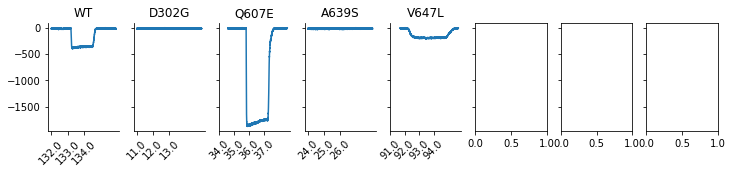

In [164]:
# Need to convert this to an axis; make them share the axes


fig, axs = plt.subplots(1, 8, figsize=(12, 2), sharey=True)

for i in range(len(df)):
    mutant = df.iloc[i, 2]
    filename = df.iloc[i,0] + '.EDR'
    centre = df.iloc[i,3]*1000
    wave = Waveform(filename, centre, 4000)
    ax = axs[i]
    
    ax.plot(wave.t,wave.I)
    ax.set_title(mutant)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks(np.arange(int(min(wave.t)), int(max(wave.t)), 1.0))
    ax.set_xticklabels(np.arange(int(min(wave.t)), int(max(wave.t)), 1.0), rotation=45)
    
plt.show()

   #np.arange(min(wave.t), max(wave.t) 
    